In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

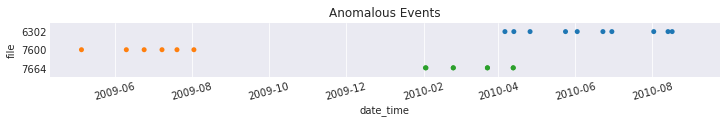

In [2]:


data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)
# sns.rugplot(ref['event DateTime'])
with sns.axes_style(style='darkgrid'):
    plt.figure(figsize=(12,1))
    sns.stripplot(x=ref['date_time'], y=ref['file'],
                 orient='h')# ref
    plt.xticks(rotation=15)
    plt.title('Anomalous Events')

In [3]:


# if not os.path.isfile(os.path.join(data_dir, 'completeDB.csv')):
#     print('reading in...')
#     df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
#                                  index_col=0, parse_dates=True),
#                     pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
#                                  index_col=0, parse_dates=True)])
#     print('creating h5...')
#     df.to_hdf(os.path.join(data_dir, 'completeDB.h5'))
#     print('done!')
# else:
#     print('reading h5...')
#     df = pd.read_csv(os.path.join(data_dir, 'completeDB.csv'), index_col=0)
#     print('done!')
df = pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), index_col=0)


In [4]:
df.head()

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,0.0,0.0,61.5508,68.6880,69.3622,69.6943,69.2811,69.1613,68.9111,68.9601,...,68.9846,67.9353,69.9003,69.6597,68.4944,70.4803,70.2361,69.0025,71.2369,70.7852
4/1/2010 0:02,0.0,0.0,61.5484,68.6872,69.3614,69.6929,69.2799,69.1613,68.9098,68.9595,...,68.9867,67.9348,69.9006,69.6606,68.4947,70.4810,70.2352,69.0017,71.2356,70.7840
4/1/2010 0:03,0.0,0.0,61.5460,68.6864,69.3606,69.6915,69.2787,69.1613,68.9085,68.9589,...,68.9887,67.9343,69.9010,69.6615,68.4951,70.4818,70.2343,69.0009,71.2343,70.7828
4/1/2010 0:04,0.0,0.0,61.5437,68.6856,69.3597,69.6900,69.2776,69.1614,68.9073,68.9583,...,68.9907,67.9337,69.9014,69.6624,68.4955,70.4825,70.2334,69.0001,71.2331,70.7815
4/1/2010 0:05,0.0,0.0,61.5413,68.6848,69.3589,69.6886,69.2764,69.1614,68.9060,68.9576,...,68.9927,67.9332,69.9017,69.6633,68.4959,70.4832,70.2325,68.9994,71.2318,70.7803


In [5]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_n = scale.fit_transform(df.values)
df_n = pd.DataFrame(data=df_n, index=df.index, columns=df.columns)

# ddf = dd.from_pandas(df, npartitions=3)

# def scale(df):
#     return (df-df.mean()).div(df.std())
# ddf.map_partitions(scale)
# ddf.div()
# scale = ddf.sub(ddf.mean(axis=0).compute()).div(ddf.std(axis=0))
# df_n = scale.compute()
df_n.head()
# df.T_1.plot(kind='kde')

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_18,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27
date_time,,,,,,,,,,,,,,,,,,,,,
4/1/2010 0:01,-0.04247,-0.064198,0.000755,-0.452382,-0.456538,-0.475757,-0.452896,-0.458635,-0.456171,-0.457126,...,-0.447052,-0.454683,-0.454825,-0.454370,-0.446376,-0.453965,-0.458338,-0.452819,-0.427404,-0.477990
4/1/2010 0:02,-0.04247,-0.064198,0.000753,-0.452383,-0.456539,-0.475758,-0.452897,-0.458635,-0.456172,-0.457127,...,-0.447050,-0.454684,-0.454824,-0.454370,-0.446376,-0.453965,-0.458339,-0.452819,-0.427405,-0.477991
4/1/2010 0:03,-0.04247,-0.064198,0.000751,-0.452383,-0.456540,-0.475759,-0.452898,-0.458635,-0.456173,-0.457127,...,-0.447049,-0.454684,-0.454824,-0.454369,-0.446375,-0.453964,-0.458339,-0.452820,-0.427406,-0.477992
4/1/2010 0:04,-0.04247,-0.064198,0.000749,-0.452384,-0.456540,-0.475760,-0.452898,-0.458635,-0.456174,-0.457128,...,-0.447047,-0.454685,-0.454824,-0.454368,-0.446375,-0.453963,-0.458340,-0.452820,-0.427407,-0.477993
4/1/2010 0:05,-0.04247,-0.064198,0.000746,-0.452385,-0.456541,-0.475762,-0.452899,-0.458635,-0.456175,-0.457128,...,-0.447045,-0.454685,-0.454823,-0.454367,-0.446375,-0.453963,-0.458341,-0.452821,-0.427408,-0.477994


In [6]:
# from dask import dataframe as dd
# from dask.multiprocessing import get


#use dask to set up the filter quickly
# ddf = dd.from_pandas(df_n, npartitions=5, name='scale_dask_data')
# mask = (ddf.abs() < 3.)
# mask.shape[0] - mask.any(axis=1).sum()
# dfo = df_n[mask.any(axis=1).compute().values]
dfo = df_n[df_n.abs()<3]
dfo.index = pd.to_datetime(dfo.index)
# dfo.shape, df_n.shape

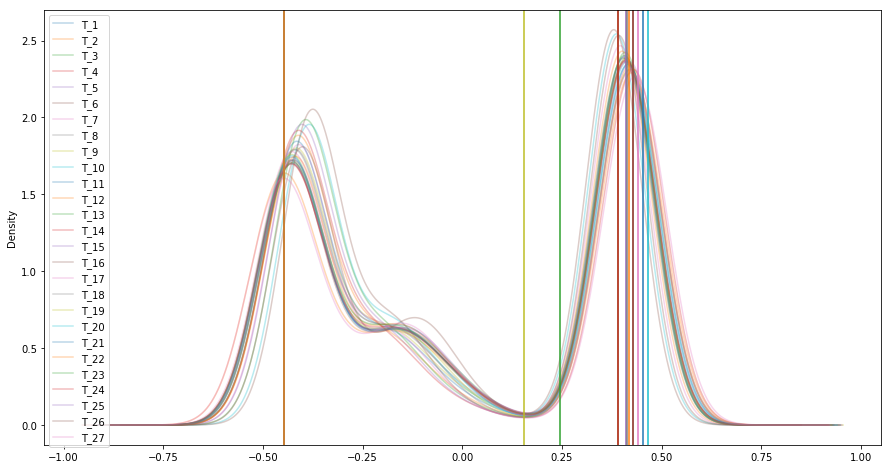

In [7]:
dfr = dfo.resample('1h').mean()
dfr.loc[:,'T_1':].plot(kind='kde', alpha=.3, figsize=(15,8))
# df_n.T_1.plot(kind='hist', bins=50)

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t, method='nearest')], 0, 2.5, color=cols[n], alpha=.2)
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].median(), color=cols[n])

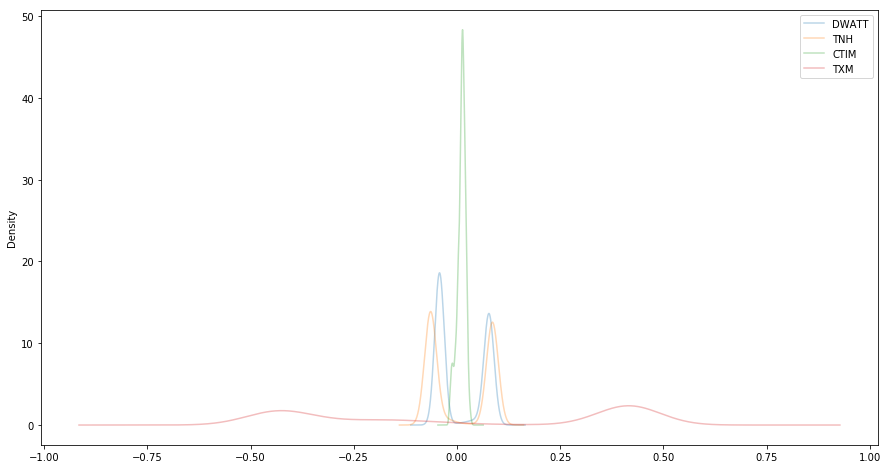

In [8]:
dfr.loc[:,:'TXM'].plot(kind='kde', alpha=.3, figsize=(15,8))

In [9]:
target = pd.Series(index=dfo.index, data=0)
target[np.isin(dfo.index,ref.date_time)] = 1


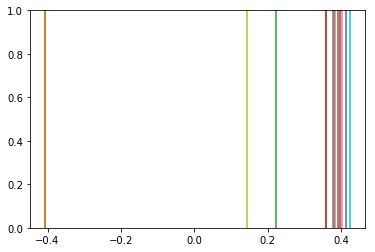

In [10]:
mask = (dfo.index-dfo.index.shift(-1, freq='60s')) == np.timedelta64(0,'60s')

cols = sns.color_palette(n_colors=ref.shape[0])

for n,t in enumerate(ref.date_time.values):
#     plt.vlines(dfo.iloc[dfo.index.get_loc(t)], 0, 2.5, color=cols[n])
    plt.axvline(dfo.iloc[dfo.index.get_loc(t, method='nearest')].mean(), color=cols[n])


In [11]:
from pomegranate import *

ndim = dfo.shape[1]

mu = np.arange(ndim)
cov = np.eye(ndim)

# mgs = [ MultivariateGaussianDistribution( mu*i, cov ) for i in range(4) ]
mgs = [ NormalDistribution(-.5, .1), NormalDistribution(-.1, .1), NormalDistribution(.5, .1)]

gmm = GeneralMixtureModel( mgs )
# hmm = HiddenMarkovModel()
gmm

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                -0.5,
                0.1
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                -0.1,
                0.1
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                0.5,
                0.1
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        -1.0986122886681098,
        -1.0986122886681098,
        -1.0986122886681098
    ]
}

In [12]:
gmm.fit(dfr.T_2.values, verbose=True, stop_threshold=1)

[1] Improvement: 3611.9320779171785	Time (s): 0.0008607
[2] Improvement: 289.3498166296836	Time (s): 0.0009212
[3] Improvement: 136.8169332050311	Time (s): 0.0009632
[4] Improvement: 51.95956065410519	Time (s): 0.0006356
[5] Improvement: 22.66750580474445	Time (s): 0.000596
[6] Improvement: 12.224011753076866	Time (s): 0.0005894
[7] Improvement: 8.07287113805296	Time (s): 0.0005863
[8] Improvement: 6.175227466746037	Time (s): 0.0006571
[9] Improvement: 5.334321943543273	Time (s): 0.0006511
[10] Improvement: 5.1247662187188325	Time (s): 0.0006452
[11] Improvement: 5.425330100879819	Time (s): 0.0007184
[12] Improvement: 6.299616895150848	Time (s): 0.0007203
[13] Improvement: 7.999775017628963	Time (s): 0.0006402
[14] Improvement: 11.0184231158687	Time (s): 0.0007415
[15] Improvement: 15.967453070901684	Time (s): 0.0006716
[16] Improvement: 22.42937377060889	Time (s): 0.000643
[17] Improvement: 26.39066580343888	Time (s): 0.0006423
[18] Improvement: 23.361004406141546	Time (s): 0.0007203


4321.106632741902

In [13]:
gmm.distributions

array([ {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        -0.4680137674026005,
        0.01
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        -0.2293645679191863,
        0.18370158074373147
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "name" :"NormalDistribution",
    "parameters" :[
        0.4253082929738845,
        0.01
    ],
    "frozen" :false
}], dtype=object)

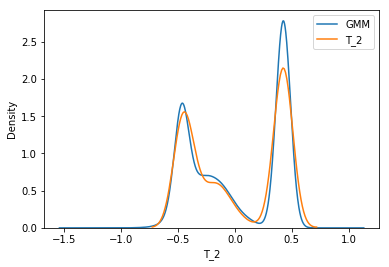

In [20]:
pd.DataFrame(np.array(gmm.sample(10000))).plot(kind='kde', label='GMM')
sns.distplot(dfr.T_2, hist=False, label='T_2')
plt.legend(['GMM', 'T_2'])

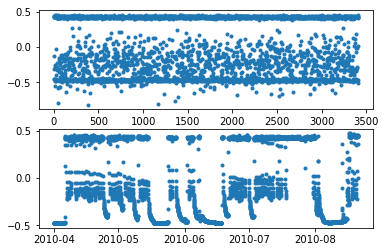

In [54]:
plt.subplot(211)
plt.plot(np.array(gmm.sample(3408)), '.')
plt.subplot(212)
plt.plot(dfr.T_2, '.')


In [23]:
d1 = gmm.distributions[0]
d2 = gmm.distributions[1]
d3 = gmm.distributions[2]

s1 = State(d1, 'background')
s2 = State(d2, 'trans')
s3 = State(d3, 'active')

hmm = HiddenMarkovModel('sys-modeler')
hmm.add_states(s1, s2, s3)
hmm.add_transition(hmm.start, s1, 1.)
hmm.add_transition(s1, s1, .5)  # stays off
hmm.add_transition(s1, s2, .5)  # starts
hmm.add_transition(s2, s2, .2)  # still starting
hmm.add_transition(s2, s3, .4)  # to active
hmm.add_transition(s3, s3, .8)  # stays active
hmm.add_transition(s3, s2, .2)  # done
hmm.add_transition(s2, s1, .4)  # off

hmm.bake()

In [44]:
int_seq = gmm.predict(dfr.T_2.values.reshape(-1,1))
state_seq = [{0:'background', 1:'trans', 2:'active'}[i] for i in int_seq]
hmm.fit(state_seq)


ValueError: could not convert string to float: 'background'

In [68]:
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components=3, X=[dfr.T_2.values])

# model

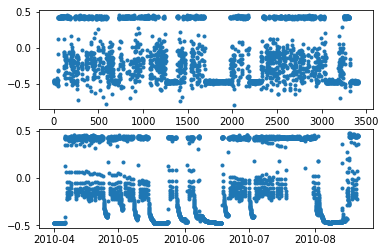

In [69]:
plt.subplot(211)
plt.plot(np.array(model.sample(3408)), '.')
plt.subplot(212)
plt.plot(dfr.T_2, '.')

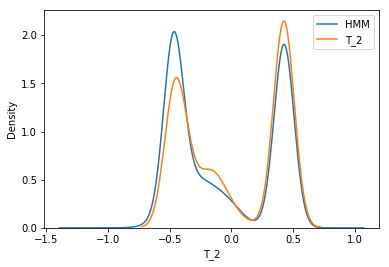

In [70]:
pd.DataFrame(np.array(model.sample(3408))).plot(kind='kde', label='HMM')
sns.distplot(dfr.T_2, hist=False, label='T_2')
plt.legend(['HMM', 'T_2'])